<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-26 03:32:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  66.1MB/s    in 3.1s    

2025-06-26 03:32:42 (66.1 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite1')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [11]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


DatabaseError: Execution failed on sql 'SELECT COUNT(*) FROM main': no such table: main

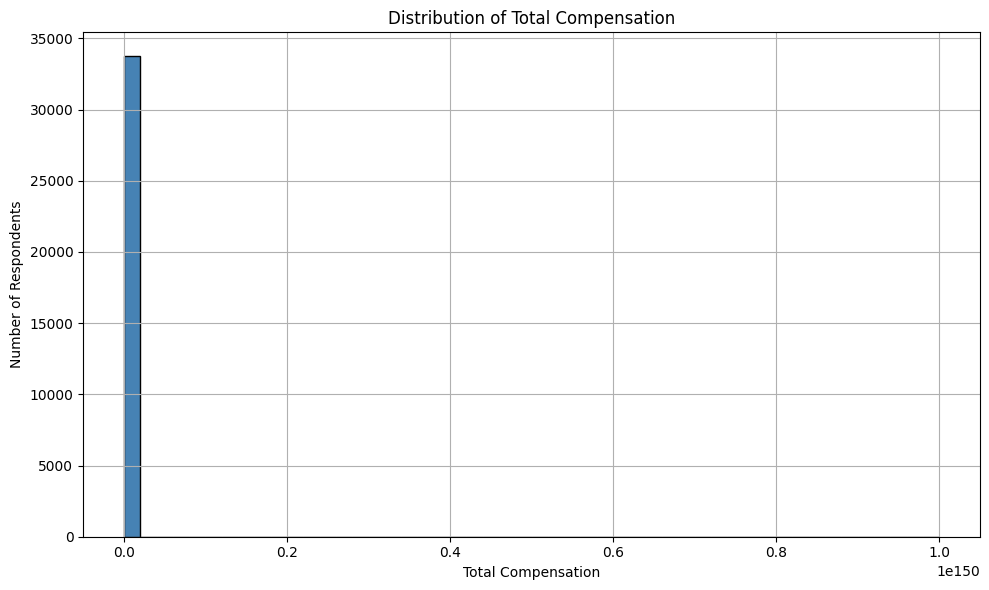

In [12]:
df = pd.read_csv("survey-data.csv")
import matplotlib.pyplot as plt

# Drop missing or invalid compensation values and convert to numeric
comp_data = pd.to_numeric(df['CompTotal'], errors='coerce').dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Demo 2: List All Tables


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name


#### Demo 3: Group Data by Age


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


DatabaseError: Execution failed on sql '
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
': no such table: main

## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


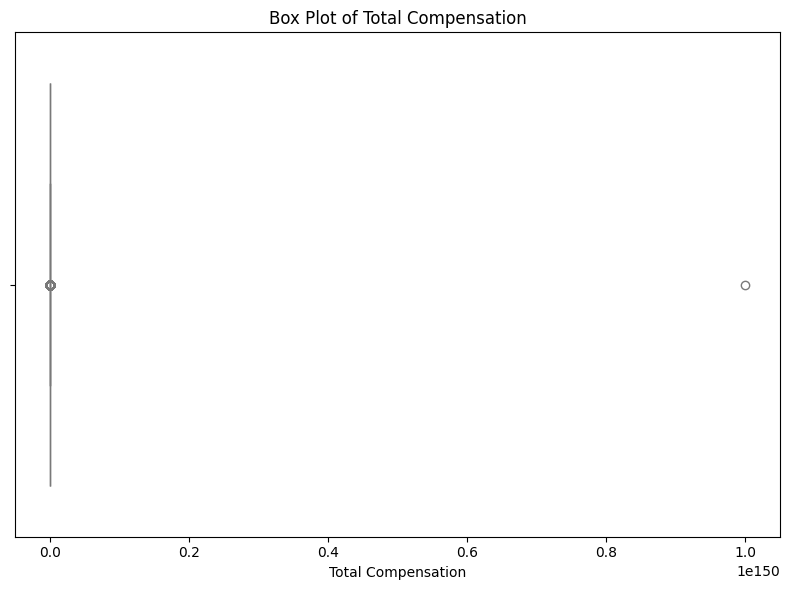

In [13]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert CompTotal to numeric and drop invalid values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_filtered = df[df['CompTotal'].notna() & (df['CompTotal'] > 0)]

# Step 2: Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['CompTotal'], color='lightblue')

plt.title('Box Plot of Total Compensation')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


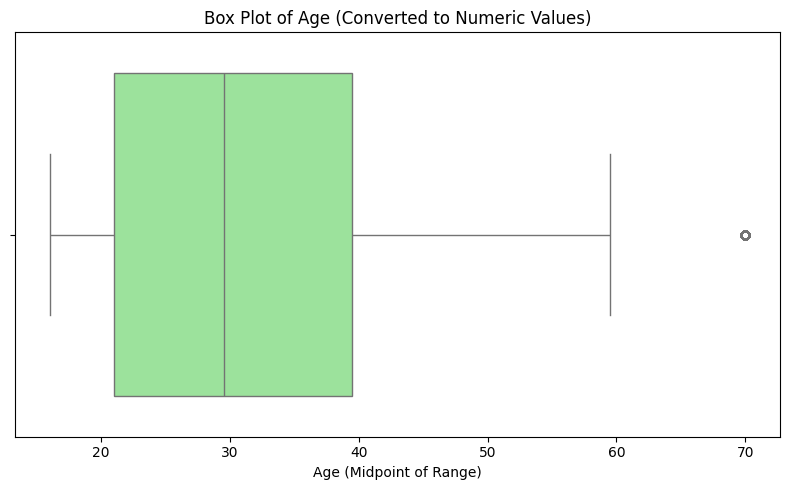

In [17]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define mapping from categorical age to numeric (midpoints)
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Step 2: Apply mapping to create a numeric age column
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 3: Drop missing/invalid values
df_clean = df[df['AgeNumeric'].notna()]

# Step 4: Plot the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['AgeNumeric'], color='lightgreen')

plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.xlabel('Age (Midpoint of Range)')
plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


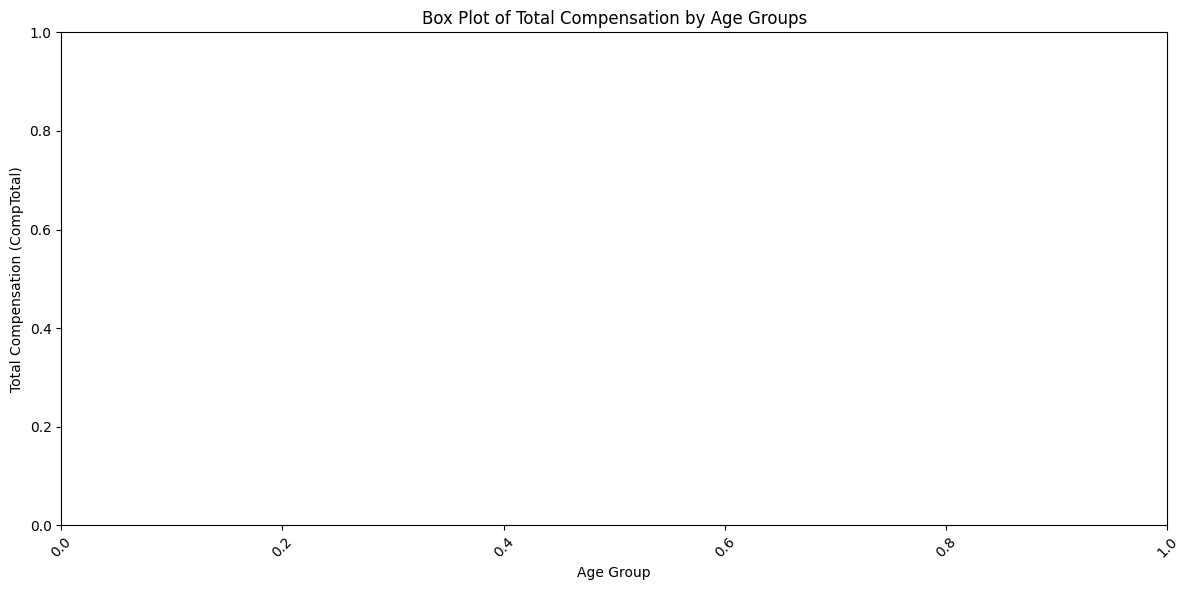

In [19]:

# Example age group categories you might have in your data
age_categories = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

# Make sure 'Age' column is categorical with a specific order
df['Age'] = pd.Categorical(df['Age'], categories=age_categories, ordered=True)

# Drop rows with missing values in Age or CompTotal
df_clean = df.dropna(subset=['Age', 'CompTotal'])

# Plot box plot of CompTotal grouped by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal', data=df_clean, palette='pastel')

plt.title('Box Plot of Total Compensation by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [ ]:
# your code goes here

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


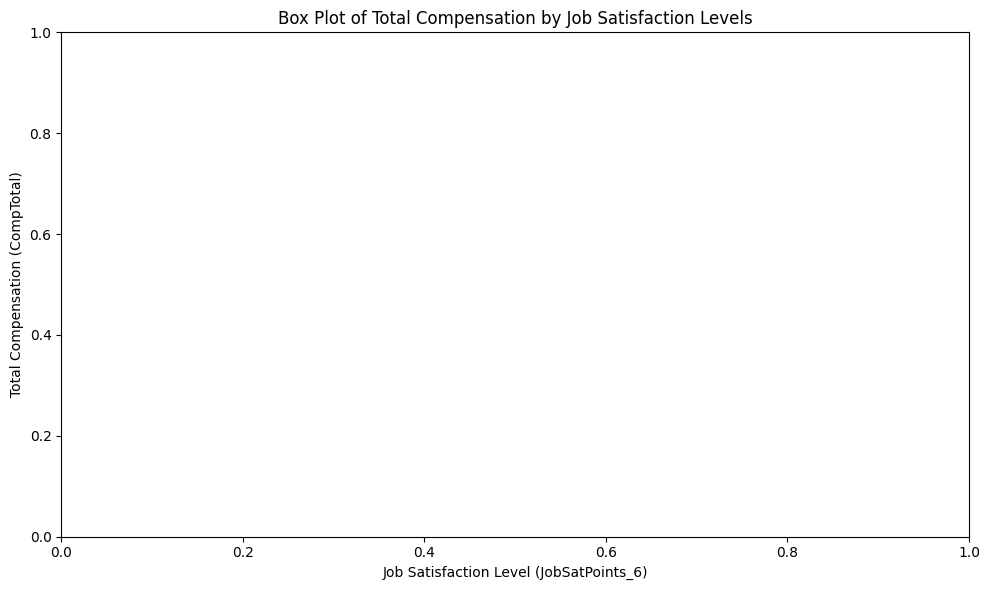

In [20]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure JobSatPoints_6 is categorical and ordered (if applicable)
# Example: If it's numeric 1-6 or labels, adjust accordingly
# If it's numeric:
df['JobSatPoints_6'] = pd.Categorical(df['JobSatPoints_6'], ordered=True)

# Drop rows with missing values in JobSatPoints_6 or CompTotal
df_clean = df.dropna(subset=['JobSatPoints_6', 'CompTotal'])

# Plot box plot of CompTotal grouped by JobSatPoints_6
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_clean, palette='coolwarm')

plt.title('Box Plot of Total Compensation by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Total Compensation (CompTotal)')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [ ]:
# your code goes here

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [ ]:
# your code goes here

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
